<a href="https://colab.research.google.com/github/MatheusB2002/Analise-Incendios-Florestais/blob/main/An%C3%A1liseInc%C3%AAndio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center><font color = 'gold' c> Este Notebook é Dedicado à análise dos Incendios Florestais no Brasil.</font>

#<Font color= Gold> Introduzindo a Visualização do Dataset </font>
##<font size = 2>Começarei com a importação das **bibliotecas** necessárias e também do **dataset** que será utilizado aqui.</font>



In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<font size= 2>Para a importação do Dataset pedido decidi colocá-lo em um repositório do GitHub para que haja segurança de que o código de importaçao do Csv irá funcionar perfeitamente para qualquer pessoa que rodar ele.</font>

<font size = 2, color = Gold>Importando o Dataset de Incêndios Florestais:</font>


In [80]:
incendios = pd.read_csv('https://raw.githubusercontent.com/MatheusB2002/Analise-Incendios-Florestais/main/amazon.csv',encoding = 'latin1')

incendios.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01



<font size = 2> Na primeira visualização identifiquei a necessidade de fazer uma tradução para melhor visualização.
utilizei o método  "*rename*" do *pandas* para fazer essa mudança e descrevi o nome anterior e a substituição utilizando o dicionário do *Python* como parâmetro do método.

In [81]:
incendios = incendios.rename(columns={
    "year": "Ano",
    "state": "Estado",
    "month": "Mês",
    "number": "Número",
    "date" : "Data"
}
)

<font size = 2>Logo após eu queria saber se os valores tinham algum erro para que pudesse reparar. Numerarei para que fique mais fácil de identificar erros em contagens ou algo do tipo.

In [82]:
Ano = incendios['Ano'].unique()
for i,j in enumerate(Ano, start=1):
  print(f'{i} - {j}')

1 - 1998
2 - 1999
3 - 2000
4 - 2001
5 - 2002
6 - 2003
7 - 2004
8 - 2005
9 - 2006
10 - 2007
11 - 2008
12 - 2009
13 - 2010
14 - 2011
15 - 2012
16 - 2013
17 - 2014
18 - 2015
19 - 2016
20 - 2017


In [84]:
Estados = (incendios['Estado'].unique())

for i,j in enumerate(Estados, start=1):
  print(f'{i} - "{j}"')

1 - "Acre"
2 - "Alagoas"
3 - "Amapa"
4 - "Amazonas"
5 - "Bahia"
6 - "Ceara"
7 - "Distrito Federal"
8 - "Espirito Santo"
9 - "Goias"
10 - "Maranhao"
11 - "Mato Grosso"
12 - "Minas Gerais"
13 - "Pará"
14 - "Paraiba"
15 - "Pernambuco"
16 - "Piau"
17 - "Rio"
18 - "Rondonia"
19 - "Roraima"
20 - "Santa Catarina"
21 - "Sao Paulo"
22 - "Sergipe"
23 - "Tocantins"


<font size = 2>O que podemos observar foi que a Coluna de Anos tem todos os seus valores colocados de forma correta. 
A coluna de Estados há erros de grafia tanto faltando caractere, tanto erro de acentuação além de não termos dados coletados de 4 Estados.                   

<font size = 2>As aspas são colocadas para identificar possíveis espaços antes ou depois das strings dos estados.


---
#<font color = Gold> Iniciando limpeza e adaptações:


In [85]:
incendios['Estado'] = (incendios['Estado'].replace(['Piau', 'Rio','Sao Paulo','Rondonia','Paraiba','Maranhao','Goias','Espirito Santo','Ceara','Amapa'],
                                                   ['Piauí', 'Rio de Janeiro','São Paulo','Rondônia','Paraíba','Maranhão','Goiás','Espírito Santo','Ceará','Amapá']))

<font size = 2> Utilizarei o método "*info*" do *pandas* para que ele me dê uma descrição do documento em análise e o método "describe" para que ajude a entender a distribuição dos dados numéricos. 

In [86]:
incendios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ano     6454 non-null   int64  
 1   Estado  6454 non-null   object 
 2   Mês     6454 non-null   object 
 3   Número  6454 non-null   float64
 4   Data    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [88]:
incendios.describe()

,Ano,Número
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


#<font color = Gold> Informações observadas na descrição do Csv:</font>

1. Todas as colunas estão no formato correto, não será necessário fazer alterações;</font>

2. Existem 6454 linhas (0 ao 6453) e 5 colunas com todas as suas linhas preenchidas (nenhuma linha vazia ou valor inválido);</font>

3. Como são dados de um país com uma grande diversidade em todos os sentidos, é possivel enxergar que há outiliers só pela distribuição;</font>

4. O desvio padrão do Número de incêncendios demonstra uma má distribuição dos dados, mas acho que isso é explicado pela questão da diversidade. O Brasil é grande o suficiente para que exista interações naturais diferentes dependendo da região, tendo áreas com diferentes biomas;
</font>

5. A distribuição dos anos está bem feita, significando que não há anos em que nao houve registros.



---
#  <Font size = 3> Para melhor visualizar essa distribuição dos Números de Incêndios Florestais, utilizarei o "*boxplot*" do *Seaborn* e junto usarei o *Matplotlib* para ajustes:



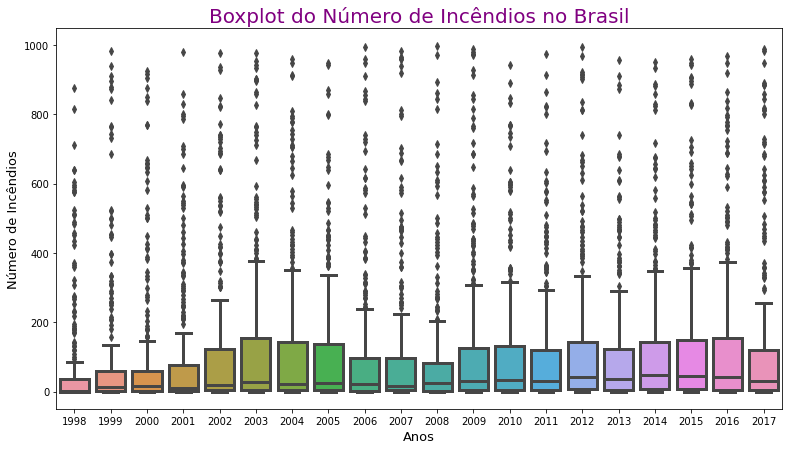

In [89]:

plt.figure(figsize =(13, 7))
sns.boxplot( x = 'Ano', y = 'Número',data = incendios, linewidth = 3)

plt.title("Boxplot do Número de Incêndios no Brasil", loc="center", fontsize=20, color= 'Purple')
plt.ylabel("Número de Incêndios",fontsize=13)
plt.xlabel("Anos",fontsize=13)

plt.show();

#<Font color = "Gold"> O que pode ser concluido com a visualização do boxplot?</font>

Em todos os anos há outliers, afirmando assim que há uma diversidade enorme no País. 

A mediana se encontra muito baixa, significando que metade do pais teve valores baixos de Incêndios e a outra metade possui lugares que alcançam 998 queimadas registradas num mês.

É possível concluir que é mais plausível permanecer com todos os dados ao disperdissá-los ou normalizá-los criando assim uma oportunidade de melhores visualizações onde poderemos identificar exatamente os lugares que estão tendo esses valores absurdos de incêndios identificados.





# <font color = Gold>Criação de colunas para auxílio nas análises:</font> 💡

<font color = gold>Representação e descrição de colunas</font>

<font size = 2>Deixarei essa reprentação para se surgir ideias de acréscimo de colunas adicionar aqui: </font>


| Coluna       | <font color = Gold>Descrição </font>                  |
|  ---         |                     ---                               | 
| Ano          | Ano em que foi computado o incêndio Florestal         |
| Estado_Sigla | Abreviação do nome do Estado                          |
| Estado       | Lugar onde foi computado o incêndio Florestal         |
| Mês          | Mês em que o incêndio Florestal foi computado         |
| Número       | Quantidade de incêndios Florestais computados         |
| Data         | Data Exata em que foi computado o incêndio Florestal  |
| Região       | Separaçao dos estados por região                      |
| Biomas       | Colocaremos os Biomas de cada estado                  |


---

<font size = 2>
Então vamos criar a coluna " Região " para futuramente usar no dashboard:

#<font color = Gold> Criando Coluna "Região":


In [90]:
dicionarioRegioes = {
'Nordeste' : ['Alagoas', 'Bahia', 'Ceará', 'Maranhão', 'Paraíba', 'Pernambuco', 'Piauí', 'Sergipe'],
'Norte' : ['Acre', 'Amapá', 'Amazonas', 'Pará', 'Rondônia', 'Roraima', 'Tocantins'],
'Sudeste' : ['Espírito Santo', 'Minas Gerais', 'Rio de Janeiro', 'São Paulo'],
'Sul' : ['Santa Catarina'],
'Centro-Oeste' : ['Distrito Federal', 'Goiás', 'Mato Grosso'],

}

incendios['Região'] = incendios['Estado'].apply( 
    lambda x :[chave for id, chave in enumerate(dicionarioRegioes) if x in dicionarioRegioes[chave]][0]
    )

<font size = 2> Coluna adicionada com sucesso! Para realizar essa tarefa, construi um dicionário onde as chaves são os nomes das regiões e os valores são os nomes de cada estado.

<font size = 2>Após a conclusão do dicionário, criei a coluna "*Região*" colocando dentro dela os nomes das chaves em que os estádos batiam com os valores dentro dessas chaves. Para essa iteração, foi utilizado uma função *lambda* no "*apply*" e *List Comprehension*. Com a lista formada, pegamos a string atravez de seu índice.

<font size = 2>Para confirmarmos que ocorreu tudo da forma que queremos utilizarei a função "*Sample*" para vizualizarmos linhas aleatórias do arquivo:

In [91]:
incendios.sample(10)

,Ano,Estado,Mês,Número,Data,Região
5009,2006,Rio de Janeiro,Dezembro,15.00,2006-01-01,Sudeste
4471,2006,Rio de Janeiro,Setembro,197.00,2006-01-01,Sudeste
5105,2003,Rondônia,Maio,21.00,2003-01-01,Norte
5904,2005,São Paulo,Setembro,231.00,2005-01-01,Sudeste
169,2007,Acre,Setembro,2.08,2007-01-01,Norte
3817,2009,Paraíba,Dezembro,30.00,2009-01-01,Nordeste
4668,2004,Rio de Janeiro,Julho,5.00,2004-01-01,Sudeste
1496,1999,Distrito Federal,Abril,0.00,1999-01-01,Centro-Oeste
3839,2012,Pernambuco,Janeiro,146.00,2012-01-01,Nordeste
3843,2016,Pernambuco,Janeiro,24.00,2016-01-01,Nordeste


<font size = 2> Pode-se observar que os valores foram adicionados da forma correta, agora podemos filtrar os estados por região. Isso é ótimo para criar gráficos de mapas, treemaps além de várias outras possibilidades nos filtros. 
Com a coluna adicionada podemos prosseguir com as análises.


---


<font size  = 2>
Para continuarmos, adicionaremos os biomas predominantes em cada estado. A forma em que essa adição será feita vai ser a mesma das Regiões. Existem estados que possuem mais de um bioma, para eles, essa coluna terá uma lista que guarda seus biomas.

#<font color = Gold> Criando Coluna "Bioma":

In [92]:
dicionarioBiomas = {
'Caatinga'       : ['Alagoas', 'Bahia', 'Ceará', 'Maranhão', 'Paraíba', 'Pernambuco', 'Piauí', 'Sergipe'],
'Amazônia'       : ['Acre', 'Amapá', 'Amazonas', 'Pará', 'Rondônia', 'Roraima','Maranhão','Mato Grosso'],
'Mata Atlântica' : ['Espírito Santo', 'Minas Gerais', 'Rio de Janeiro', 'São Paulo','Santa Catarina','Sergipe','Bahia'],
'Cerrado'        : ['Distrito Federal', 'Goiás', 'Mato Grosso', 'Tocantins', 'Maranhão','Piauí','Bahia','Minas Gerais', 'São Paulo'],

}
incendios['Bioma'] = incendios['Estado'].apply( 
    lambda x :[chave for id, chave in enumerate(dicionarioBiomas) if x in dicionarioBiomas[chave]]

    )
incendios.sample(10)

,Ano,Estado,Mês,Número,Data,Região,Bioma
4792,2009,Rio de Janeiro,Janeiro,65.000,2009-01-01,Sudeste,[Mata Atlântica]
4332,2007,Rio de Janeiro,Fevereiro,15.000,2007-01-01,Sudeste,[Mata Atlântica]
6180,2002,Sergipe,Novembro,57.000,2002-01-01,Nordeste,"[Caatinga, Mata Atlântica]"
4718,2014,Rio de Janeiro,Setembro,30.000,2014-01-01,Sudeste,[Mata Atlântica]
173,2011,Acre,Setembro,1.204,2011-01-01,Norte,[Amazônia]
3380,2011,Paraíba,Fevereiro,5.000,2011-01-01,Nordeste,[Caatinga]
4520,2015,Rio de Janeiro,Novembro,6.000,2015-01-01,Sudeste,[Mata Atlântica]
801,2001,Amazonas,Maio,0.000,2001-01-01,Norte,[Amazônia]
3002,2011,Minas Gerais,Julho,801.000,2011-01-01,Sudeste,"[Mata Atlântica, Cerrado]"
2571,1998,Mato Grosso,Outubro,2.707,1998-01-01,Centro-Oeste,"[Amazônia, Cerrado]"


<font size = 2>Lembrando que a ideia aqui foi colocar os biomas  <font color = gold >**PREDOMINANTES** </font>
de cada estado.
Existem estados que possuem biomas que nao foram adicionados no dataset e eu listo aqui o porquê de cada um:</font>

1. <font size = 2>Tocantins tem o bioma de *Amazônia* mas é uma pequena mancha que é desprezável aqui nessa análise pois pode acontecer de outro bioma no mesmo estado ter uma taxa de incêndio mais alta do que esse bioma que é somente uma pequena fração.

2. <font size = 2>Assim também acontece no estado de Minas Gerais que possui uma pequena faixa de *Caatinga* além do estado do Rio Grande do Norte com o bioma de *Caatninga*, porém, não temos registro desse Estado no nosso Dataset.


---

De acordo com a minha experiência com o Power BI, a plataforma tem uma dificuldade de reconhecer os estados pelos nomes, ainda mais quando existem estados que começam com o mesmo nome, por exemplo:

<font size= 2, color = Gold> Mato Grosso </font ><font size = 3>≃ <font size= 2, color = Gold> Mato Grosso do Sul</font >

<font size= 2, color = Gold> Rio Grande do Sul </font ><font size = 3>≃ <font size= 2, color = Gold> Rio Grande do Norte</font >

<font size = 2> Para resolver isso, seria legal criar uma coluna com a sigla dos Estados, pois assim, a plataforma reconhecerá mais facilmente.


#<font color = Gold> Criando Coluna "Estado_Sigla":


In [93]:
dicionarioSiglas = {
    'Acre': 'AC',
    'Alagoas': 'AL',
    'Amapá': 'AP',
    'Amazonas': 'AM',
    'Bahia': 'BA',
    'Ceará': 'CE',
    'Distrito Federal': 'DF',
    'Espírito Santo': 'ES',
    'Goiás': 'GO',
    'Maranhão': 'MA',
    'Mato Grosso': 'MT',
    'Minas Gerais': 'MG',
    'Pará': 'PA',
    'Paraíba': 'PB',
    'Pernambuco': 'PE',
    'Piauí': 'PI',
    'Rio de Janeiro': 'RJ',
    'Rondônia': 'RO',
    'Roraima': 'RR',
    'Santa Catarina': 'SC',
    'São Paulo': 'SP',
    'Sergipe': 'SE',
    'Tocantins': 'TO'
  }

incendios['Estado_Sigla'] = incendios['Estado'].apply(
    lambda Estado: [dicionarioSiglas[chave] for id, chave in enumerate(dicionarioSiglas) if Estado == chave][0])

incendios.sample(10)

,Ano,Estado,Mês,Número,Data,Região,Bioma,Estado_Sigla
2605,2012,Mato Grosso,Novembro,375.000,2012-01-01,Centro-Oeste,"[Amazônia, Cerrado]",MT
1846,2010,Espírito Santo,Setembro,53.000,2010-01-01,Sudeste,[Mata Atlântica],ES
3216,2006,Pará,Junho,78.000,2006-01-01,Norte,[Amazônia],PA
956,2016,Amazonas,Dezembro,133.000,2016-01-01,Norte,[Amazônia],AM
1810,2014,Espírito Santo,Julho,17.000,2014-01-01,Sudeste,[Mata Atlântica],ES
3479,2010,Paraíba,Julho,7.000,2010-01-01,Nordeste,[Caatinga],PB
5307,2006,Roraima,Março,385.000,2006-01-01,Norte,[Amazônia],RR
3884,2017,Pernambuco,Março,7.000,2017-01-01,Nordeste,[Caatinga],PE
2808,2016,Mato Grosso,Setembro,2.383,2016-01-01,Centro-Oeste,"[Amazônia, Cerrado]",MT
6343,2006,Tocantins,Julho,430.000,2006-01-01,Norte,[Cerrado],TO


<font size = 2> Para obtermos essa coluna foi usada a mesma estratégia de criação das demais.
Primeiramente foi criado um dicionário sendo a chave desse dicionário o nome do Estado, o valor da chave é a sigla desse Estado. Usando o "*apply*" inserindo um *List Comprehension* dentro de uma função *lambda* conferindo se o Estado tem o mesmo nome da chave, se sim, resgata o valor da chave e adiciona à lista. Ao final de tudo a string é resgatada atravez de seu índice


---
<font size = 2> Após criarmos todas as colunas desejadas, vamos conferir como está o estado de todo o dataset com as mudanças. Faremos isso usando o método "*Info*".


In [99]:
incendios.info()

print('\n\nConferindo se todas as Siglas foram adicionadas')



siglasEstados = incendios['Estado_Sigla'].unique()

for i, Siglas in enumerate(siglasEstados, start=1):
   print(f'{i} - "{Siglas}"')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ano           6454 non-null   int64  
 1   Estado        6454 non-null   object 
 2   Mês           6454 non-null   object 
 3   Número        6454 non-null   float64
 4   Data          6454 non-null   object 
 5   Região        6454 non-null   object 
 6   Bioma         6454 non-null   object 
 7   Estado_Sigla  6454 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 403.5+ KB


Conferindo se todas as Siglas foram adicionadas
1 - "AC"
2 - "AL"
3 - "AP"
4 - "AM"
5 - "BA"
6 - "CE"
7 - "DF"
8 - "ES"
9 - "GO"
10 - "MA"
11 - "MT"
12 - "MG"
13 - "PA"
14 - "PB"
15 - "PE"
16 - "PI"
17 - "RJ"
18 - "RO"
19 - "RR"
20 - "SC"
21 - "SP"
22 - "SE"
23 - "TO"


<font size = 2> Tudo nos conformes, todas as linhas do arquivo foram preenchidas corretamente e todas as Siglas estão dentro do dataframe. Uma observação a se fazer é que o uso da memória quase dobrou com as adições feitas, acredito que não vá atrapalhar, isso pode muito bem ser explicado pela coluna de **Bioma** por alguns estados possuírem mais de um bioma, guardar esssas informações é um tanto quanto mais complicado do que as das demais colunas.
Com tudo caminhando devidamente, prosseguirei agora com a análise dos dados que esse arquivo pode oferecer para nós.

#<font color = gold> Iniciando as Análises: